<a href="https://colab.research.google.com/github/oerv13-gh/Ibero/blob/main/Semana_6__Apr_auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fundamentos

Refuerzo

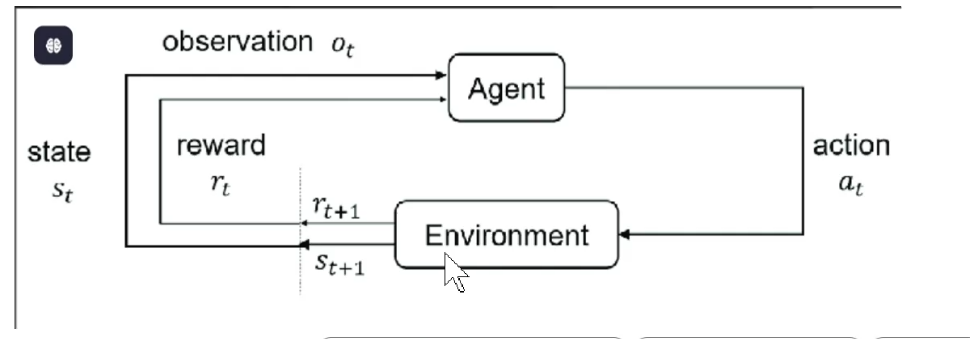

In [1]:
# Ejemplo conceptual de recompensa acumulada

rewards = [1, -1, 2, 0, 3]
cumulative_reward = sum(rewards)

print("Recompensa acumulada:", cumulative_reward)

Recompensa acumulada: 5


Recompensa Acumulada

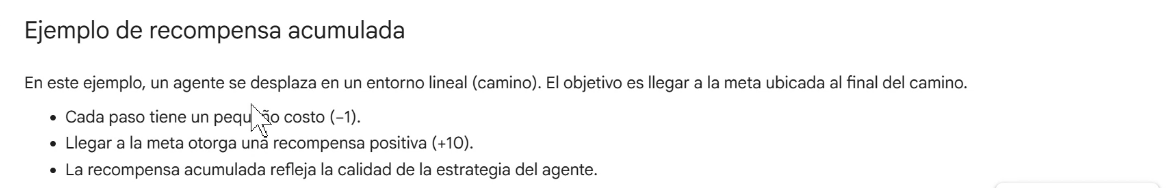

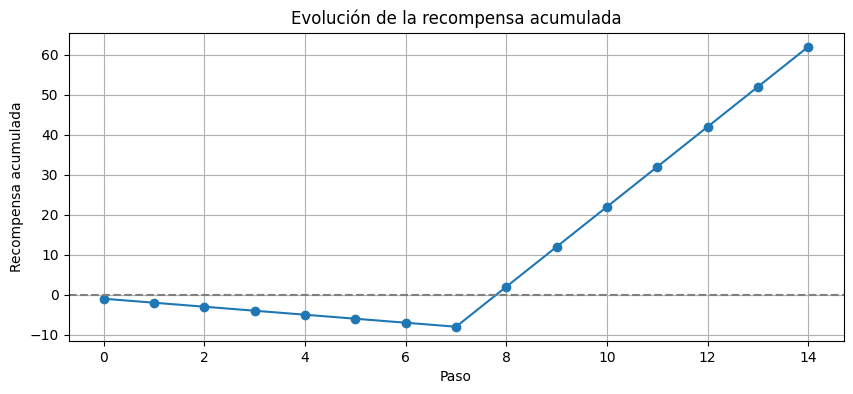

[-1, -2, -3, -4, -5, -6, -7, -8, 2, 12, 22, 32, 42, 52, 62]

In [2]:
import matplotlib.pyplot as plt

# Definición del entorno
path_length = 10
goal_position = path_length - 1
agent_position = 0

# Registro de recompensas
rewards = []
positions = [agent_position]

# Simulación de episodios
for step in range(15):
    # Acción: avanzar una posición
    agent_position = min(agent_position + 1, goal_position)
    positions.append(agent_position)

    # Recompensa
    if agent_position == goal_position:
        reward = 10
    else:
        reward = -1

    rewards.append(reward)

# Recompensa acumulada
cumulative_rewards = [sum(rewards[:i+1]) for i in range(len(rewards))]

# Visualización
plt.figure(figsize=(10,4))
plt.plot(cumulative_rewards, marker='o')
plt.axhline(0, linestyle='--', color='gray')
plt.title("Evolución de la recompensa acumulada")
plt.xlabel("Paso")
plt.ylabel("Recompensa acumulada")
plt.grid(True)
plt.show()

cumulative_rewards


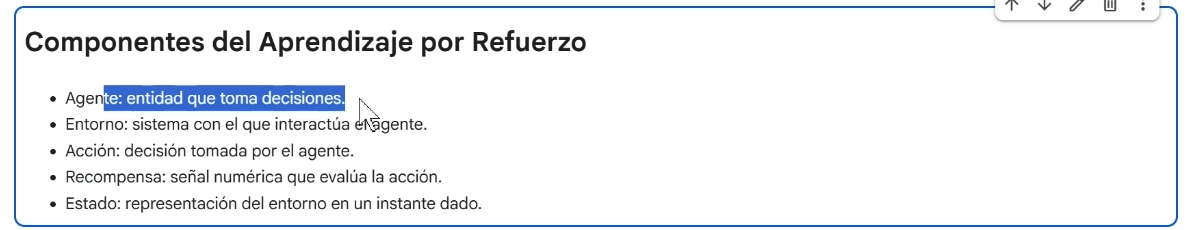

In [3]:
import random

actions = ["izquierda", "derecha"]
state = 0

def environment(action):
    if action == "derecha":
        return 1, 1   # nuevo estado, recompensa
    else:
        return 0, -1

action = random.choice(actions)
new_state, reward = environment(action)

print("Acción:", action)
print("Nuevo estado:", new_state)
print("Recompensa:", reward)



Acción: derecha
Nuevo estado: 1
Recompensa: 1


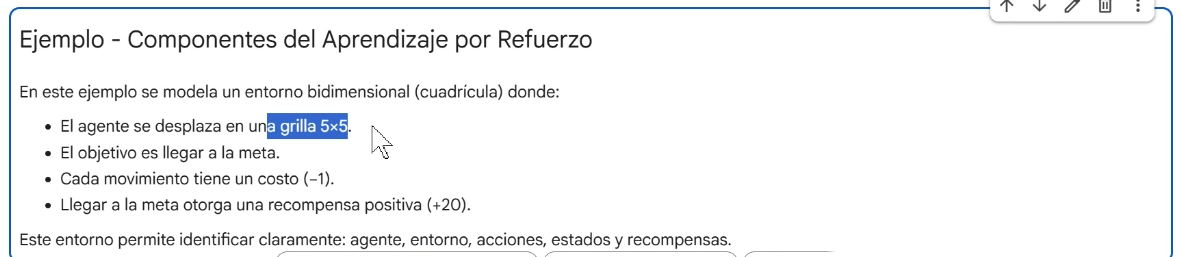

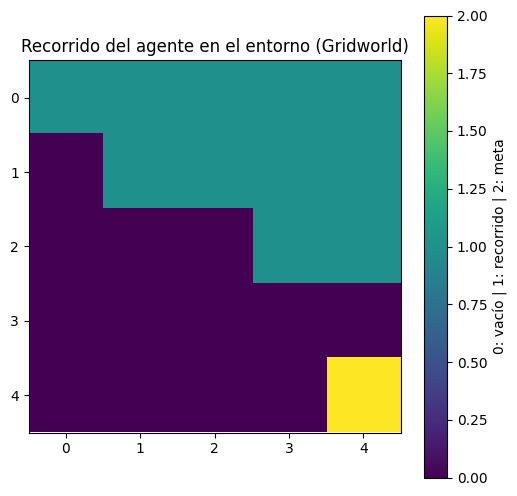

Recompensa total: -20
Acciones ejecutadas: [np.str_('arriba'), np.str_('derecha'), np.str_('abajo'), np.str_('arriba'), np.str_('derecha'), np.str_('derecha'), np.str_('derecha'), np.str_('derecha'), np.str_('abajo'), np.str_('derecha'), np.str_('abajo'), np.str_('izquierda'), np.str_('arriba'), np.str_('derecha'), np.str_('izquierda'), np.str_('arriba'), np.str_('arriba'), np.str_('arriba'), np.str_('izquierda'), np.str_('abajo')]


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Tamaño del entorno
grid_size = 5
agent_pos = [0, 0]
goal_pos = [4, 4]

# Acciones posibles
actions = {
    "arriba": (-1, 0),
    "abajo": (1, 0),
    "izquierda": (0, -1),
    "derecha": (0, 1)
}

def step(position, action_delta):
    new_pos = [
        max(0, min(grid_size - 1, position[0] + action_delta[0])),
        max(0, min(grid_size - 1, position[1] + action_delta[1]))
    ]
    reward = 20 if new_pos == goal_pos else -1
    return new_pos, reward

# Simulación
positions = [agent_pos.copy()]
rewards = []
action_names = []

np.random.seed(0)

for _ in range(20):
    action_name = np.random.choice(list(actions.keys()))   # <-- aquí se corrige
    action_delta = actions[action_name]

    agent_pos, reward = step(agent_pos, action_delta)

    positions.append(agent_pos.copy())
    rewards.append(reward)
    action_names.append(action_name)

# Visualización del recorrido
grid = np.zeros((grid_size, grid_size))
grid[goal_pos[0], goal_pos[1]] = 2

for pos in positions:
    grid[pos[0], pos[1]] = 1

plt.figure(figsize=(6,6))
plt.imshow(grid, cmap="viridis")
plt.colorbar(label="0: vacío | 1: recorrido | 2: meta")
plt.title("Recorrido del agente en el entorno (Gridworld)")
plt.show()

print("Recompensa total:", sum(rewards))
print("Acciones ejecutadas:", action_names)


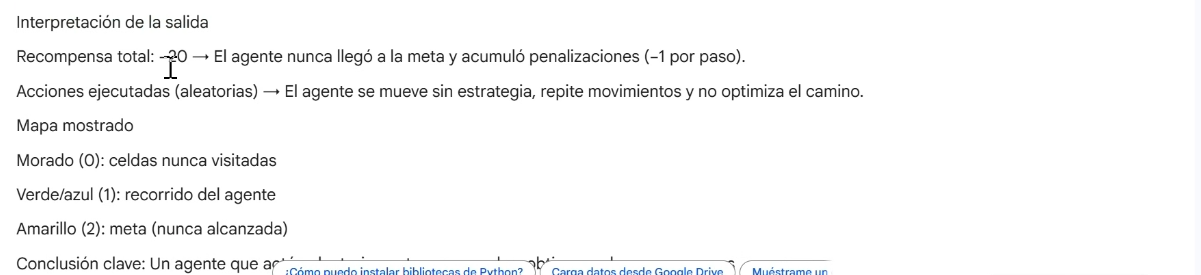

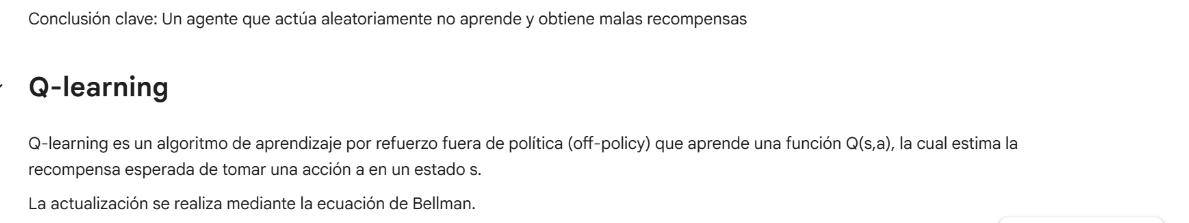

In [5]:
import numpy as np

# Estados y acciones
states = 2
actions = 2

Q = np.zeros((states, actions))

alpha = 0.1    # tasa de aprendizaje
gamma = 0.9    # factor de descuento

# Simulación de una transición
state = 0
action = 1
reward = 1
next_state = 1

Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

Q


array([[0. , 0.1],
       [0. , 0. ]])

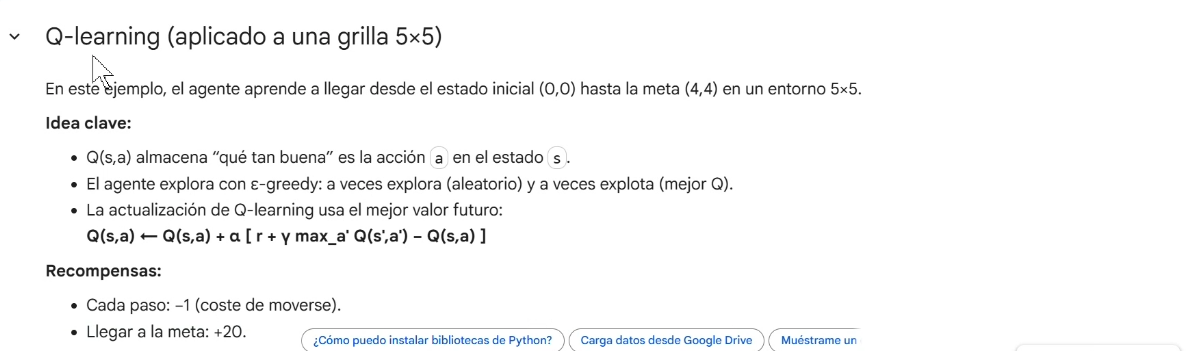

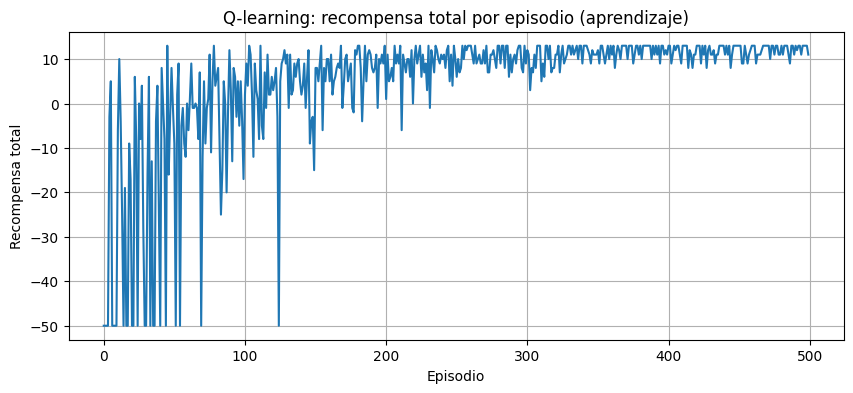

Política aprendida (S=inicio, G=meta):
S ↓ → ↓ ↓
→ ↓ → ↓ ↓
→ → → → ↓
→ → ↓ ↓ ↓
→ → → → G


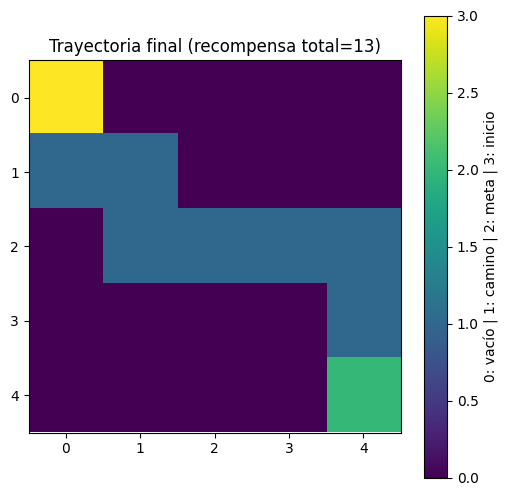

Camino (posiciones): [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 1) Entorno Gridworld 5x5
# =========================
grid_size = 5
start = (0, 0)
goal = (4, 4)

action_names = ["arriba", "abajo", "izquierda", "derecha"]
actions = {
    0: (-1, 0),  # arriba
    1: (1, 0),   # abajo
    2: (0, -1),  # izquierda
    3: (0, 1)    # derecha
}

def to_state(pos):
    """Convierte (fila,col) a índice único 0..24"""
    return pos[0] * grid_size + pos[1]

def to_pos(state):
    """Convierte índice único a (fila,col)"""
    return (state // grid_size, state % grid_size)

def step(pos, action_id):
    """Aplica una acción y retorna (nueva_pos, recompensa, terminado)"""
    dr, dc = actions[action_id]
    r = max(0, min(grid_size-1, pos[0] + dr))
    c = max(0, min(grid_size-1, pos[1] + dc))
    new_pos = (r, c)

    if new_pos == goal:
        return new_pos, 20, True
    else:
        return new_pos, -1, False

# =========================
# 2) Q-learning
# =========================
n_states = grid_size * grid_size
n_actions = len(actions)

Q = np.zeros((n_states, n_actions))

alpha = 0.2     # tasa de aprendizaje
gamma = 0.95    # descuento
epsilon = 1.0   # exploración inicial
epsilon_min = 0.05
epsilon_decay = 0.995

episodes = 500
max_steps = 50

episode_rewards = []

np.random.seed(0)

for ep in range(episodes):
    pos = start
    total_reward = 0

    for _ in range(max_steps):
        s = to_state(pos)

        # Política ε-greedy
        if np.random.rand() < epsilon:
            a = np.random.randint(n_actions)
        else:
            a = np.argmax(Q[s])

        new_pos, r, done = step(pos, a)
        s2 = to_state(new_pos)

        # Actualización Q-learning (off-policy)
        Q[s, a] = Q[s, a] + alpha * (r + gamma * np.max(Q[s2]) - Q[s, a])

        pos = new_pos
        total_reward += r

        if done:
            break

    # Decaimiento de epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    episode_rewards.append(total_reward)

# =========================
# 3) Visual 1: Curva de aprendizaje
# =========================
plt.figure(figsize=(10,4))
plt.plot(episode_rewards)
plt.title("Q-learning: recompensa total por episodio (aprendizaje)")
plt.xlabel("Episodio")
plt.ylabel("Recompensa total")
plt.grid(True)
plt.show()

# =========================
# 4) Visual 2: Política aprendida (flechas)
# =========================
arrow_map = {
    0: "↑",
    1: "↓",
    2: "←",
    3: "→"
}

policy = np.argmax(Q, axis=1)  # mejor acción en cada estado

policy_grid = np.empty((grid_size, grid_size), dtype=object)
for s in range(n_states):
    r, c = to_pos(s)
    policy_grid[r, c] = arrow_map[policy[s]]

policy_grid[goal[0], goal[1]] = "G"  # meta
policy_grid[start[0], start[1]] = "S" # inicio

print("Política aprendida (S=inicio, G=meta):")
for r in range(grid_size):
    print(" ".join(policy_grid[r]))

# =========================
# 5) Visual 3: Trayectoria final siguiendo la política
# =========================
pos = start
path = [pos]
total_reward = 0

for _ in range(max_steps):
    s = to_state(pos)
    a = np.argmax(Q[s])
    pos, r, done = step(pos, a)
    path.append(pos)
    total_reward += r
    if done:
        break

# Dibujar el camino en la grilla
grid = np.zeros((grid_size, grid_size))
grid[goal[0], goal[1]] = 2  # meta
grid[start[0], start[1]] = 3 # inicio

for p in path:
    if p != start and p != goal:
        grid[p[0], p[1]] = 1

plt.figure(figsize=(6,6))
plt.imshow(grid, cmap="viridis")
plt.colorbar(label="0: vacío | 1: camino | 2: meta | 3: inicio")
plt.title(f"Trayectoria final (recompensa total={total_reward})")
plt.show()

print("Camino (posiciones):", path)


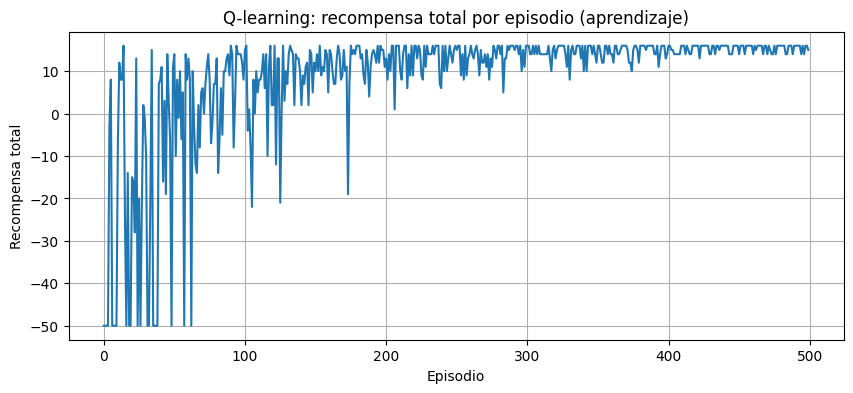

Política aprendida (S=inicio, G=meta):
→ → → S ↓
→ → → → ↓
→ → → → ↓
↑ → → → ↓
→ → ↑ → G


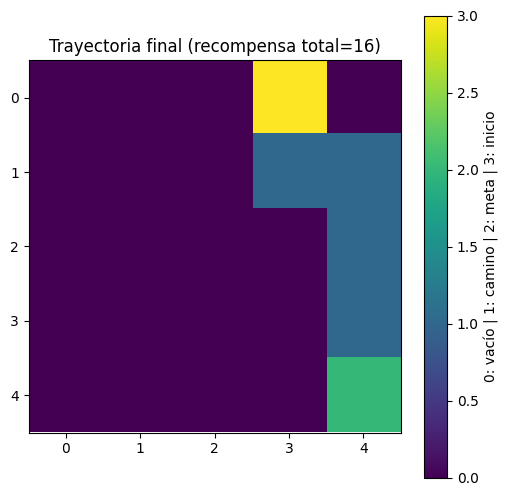

Camino (posiciones): [(0, 3), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4)]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 1) Entorno Gridworld 5x5
# =========================
grid_size = 5
start = (0, 3)
goal = (4, 4)

action_names = ["arriba", "abajo", "izquierda", "derecha"]
actions = {
    0: (-1, 0),  # arriba
    1: (1, 0),   # abajo
    2: (0, -1),  # izquierda
    3: (0, 1)    # derecha
}

def to_state(pos):
    """Convierte (fila,col) a índice único 0..24"""
    return pos[0] * grid_size + pos[1]

def to_pos(state):
    """Convierte índice único a (fila,col)"""
    return (state // grid_size, state % grid_size)

def step(pos, action_id):
    """Aplica una acción y retorna (nueva_pos, recompensa, terminado)"""
    dr, dc = actions[action_id]
    r = max(0, min(grid_size-1, pos[0] + dr))
    c = max(0, min(grid_size-1, pos[1] + dc))
    new_pos = (r, c)

    if new_pos == goal:
        return new_pos, 20, True
    else:
        return new_pos, -1, False

# =========================
# 2) Q-learning
# =========================
n_states = grid_size * grid_size
n_actions = len(actions)

Q = np.zeros((n_states, n_actions))

alpha = 0.2     # tasa de aprendizaje
gamma = 0.95    # descuento
epsilon = 1.0   # exploración inicial
epsilon_min = 0.05
epsilon_decay = 0.995

episodes = 500
max_steps = 50

episode_rewards = []

np.random.seed(0)

for ep in range(episodes):
    pos = start
    total_reward = 0

    for _ in range(max_steps):
        s = to_state(pos)

        # Política ε-greedy
        if np.random.rand() < epsilon:
            a = np.random.randint(n_actions)
        else:
            a = np.argmax(Q[s])

        new_pos, r, done = step(pos, a)
        s2 = to_state(new_pos)

        # Actualización Q-learning (off-policy)
        Q[s, a] = Q[s, a] + alpha * (r + gamma * np.max(Q[s2]) - Q[s, a])

        pos = new_pos
        total_reward += r

        if done:
            break

    # Decaimiento de epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    episode_rewards.append(total_reward)

# =========================
# 3) Visual 1: Curva de aprendizaje
# =========================
plt.figure(figsize=(10,4))
plt.plot(episode_rewards)
plt.title("Q-learning: recompensa total por episodio (aprendizaje)")
plt.xlabel("Episodio")
plt.ylabel("Recompensa total")
plt.grid(True)
plt.show()

# =========================
# 4) Visual 2: Política aprendida (flechas)
# =========================
arrow_map = {
    0: "↑",
    1: "↓",
    2: "←",
    3: "→"
}

policy = np.argmax(Q, axis=1)  # mejor acción en cada estado

policy_grid = np.empty((grid_size, grid_size), dtype=object)
for s in range(n_states):
    r, c = to_pos(s)
    policy_grid[r, c] = arrow_map[policy[s]]

policy_grid[goal[0], goal[1]] = "G"  # meta
policy_grid[start[0], start[1]] = "S" # inicio

print("Política aprendida (S=inicio, G=meta):")
for r in range(grid_size):
    print(" ".join(policy_grid[r]))

# =========================
# 5) Visual 3: Trayectoria final siguiendo la política
# =========================
pos = start
path = [pos]
total_reward = 0

for _ in range(max_steps):
    s = to_state(pos)
    a = np.argmax(Q[s])
    pos, r, done = step(pos, a)
    path.append(pos)
    total_reward += r
    if done:
        break

# Dibujar el camino en la grilla
grid = np.zeros((grid_size, grid_size))
grid[goal[0], goal[1]] = 2  # meta
grid[start[0], start[1]] = 3 # inicio

for p in path:
    if p != start and p != goal:
        grid[p[0], p[1]] = 1

plt.figure(figsize=(6,6))
plt.imshow(grid, cmap="viridis")
plt.colorbar(label="0: vacío | 1: camino | 2: meta | 3: inicio")
plt.title(f"Trayectoria final (recompensa total={total_reward})")
plt.show()

print("Camino (posiciones):", path)

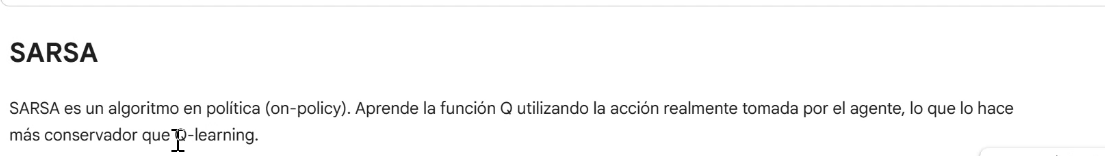

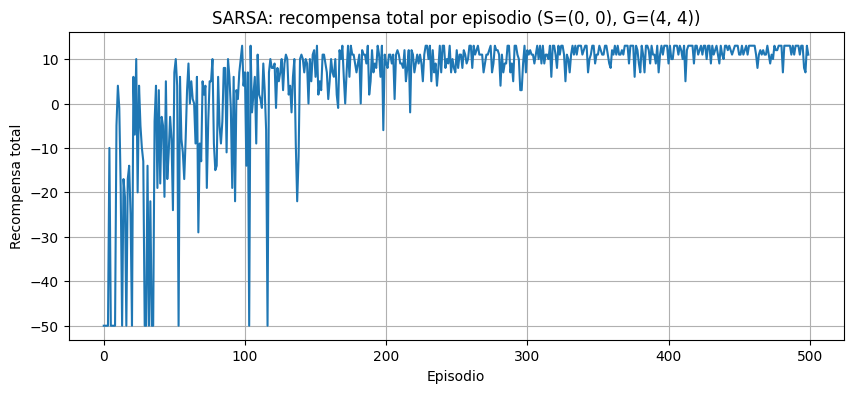

Política aprendida (S=inicio, G=meta):
S ↓ ↓ ↓ ↓
→ ↓ ↓ ↓ ↓
→ ↓ ↓ ↓ ↓
→ → → ↓ ↓
→ → → → G


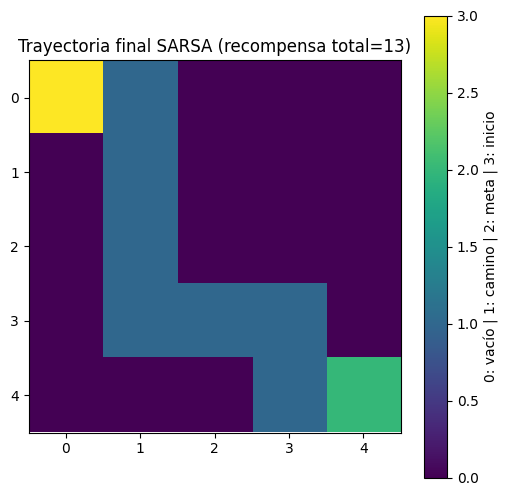

Camino (posiciones): [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (4, 3), (4, 4)]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 1) Configuración: INICIO y META
# =========================
grid_size = 5

# Cambie aquí (fila, columna) en rango 0..4
start = (0, 0)
goal  = (4, 4)

assert 0 <= start[0] < grid_size and 0 <= start[1] < grid_size, "Start fuera de la grilla"
assert 0 <= goal[0]  < grid_size and 0 <= goal[1]  < grid_size, "Goal fuera de la grilla"
assert start != goal, "Start y Goal no pueden ser iguales"

# Acciones
action_names = ["arriba", "abajo", "izquierda", "derecha"]
actions = {
    0: (-1, 0),  # arriba
    1: (1, 0),   # abajo
    2: (0, -1),  # izquierda
    3: (0, 1)    # derecha
}

def to_state(pos):
    return pos[0] * grid_size + pos[1]

def to_pos(state):
    return (state // grid_size, state % grid_size)

def step(pos, action_id):
    dr, dc = actions[action_id]
    r = max(0, min(grid_size-1, pos[0] + dr))
    c = max(0, min(grid_size-1, pos[1] + dc))
    new_pos = (r, c)

    # Recompensas
    if new_pos == goal:
        return new_pos, 20, True
    else:
        return new_pos, -1, False

def epsilon_greedy(Q, s, epsilon):
    """Elige acción con ε-greedy (explora/explota)"""
    if np.random.rand() < epsilon:
        return np.random.randint(Q.shape[1])
    return np.argmax(Q[s])

# =========================
# 2) SARSA
# =========================
n_states = grid_size * grid_size
n_actions = len(actions)

Q = np.zeros((n_states, n_actions))

alpha = 0.2
gamma = 0.95
epsilon = 1.0
epsilon_min = 0.05
epsilon_decay = 0.995

episodes = 500
max_steps = 50

episode_rewards = []
np.random.seed(0)

for ep in range(episodes):
    pos = start
    s = to_state(pos)

    # Acción inicial (on-policy)
    a = epsilon_greedy(Q, s, epsilon)

    total_reward = 0

    for _ in range(max_steps):
        new_pos, r, done = step(pos, a)
        s2 = to_state(new_pos)

        # Acción siguiente elegida por la misma política (on-policy)
        a2 = epsilon_greedy(Q, s2, epsilon)

        # Actualización SARSA
        Q[s, a] = Q[s, a] + alpha * (r + gamma * Q[s2, a2] - Q[s, a])

        pos = new_pos
        s, a = s2, a2
        total_reward += r

        if done:
            break

    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    episode_rewards.append(total_reward)

# =========================
# 3) Visual 1: Curva de aprendizaje
# =========================
plt.figure(figsize=(10,4))
plt.plot(episode_rewards)
plt.title(f"SARSA: recompensa total por episodio (S={start}, G={goal})")
plt.xlabel("Episodio")
plt.ylabel("Recompensa total")
plt.grid(True)
plt.show()

# =========================
# 4) Visual 2: Política aprendida (flechas)
# =========================
arrow_map = {0: "↑", 1: "↓", 2: "←", 3: "→"}
policy = np.argmax(Q, axis=1)

policy_grid = np.empty((grid_size, grid_size), dtype=object)
for st in range(n_states):
    r, c = to_pos(st)
    policy_grid[r, c] = arrow_map[policy[st]]

policy_grid[goal[0], goal[1]] = "G"
policy_grid[start[0], start[1]] = "S"

print("Política aprendida (S=inicio, G=meta):")
for r in range(grid_size):
    print(" ".join(policy_grid[r]))

# =========================
# 5) Visual 3: Trayectoria final siguiendo la política aprendida
# =========================
pos = start
path = [pos]
total_reward = 0

for _ in range(max_steps):
    s = to_state(pos)
    a = np.argmax(Q[s])
    pos, r, done = step(pos, a)
    path.append(pos)
    total_reward += r
    if done:
        break

grid = np.zeros((grid_size, grid_size))
grid[goal[0], goal[1]] = 2
grid[start[0], start[1]] = 3

for p in path:
    if p != start and p != goal:
        grid[p[0], p[1]] = 1

plt.figure(figsize=(6,6))
plt.imshow(grid, cmap="viridis")
plt.colorbar(label="0: vacío | 1: camino | 2: meta | 3: inicio")
plt.title(f"Trayectoria final SARSA (recompensa total={total_reward})")
plt.show()

print("Camino (posiciones):", path)


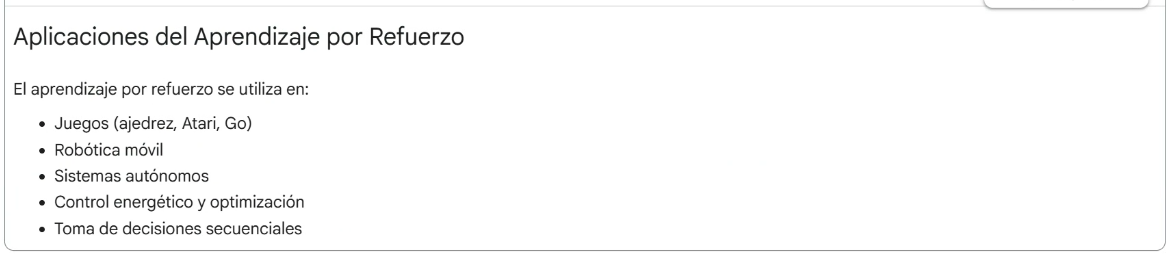